### Monitoring the localisation of free GCN4

Context:
- Just confirming that the GCN4 domain alone shows no membrane association

Results:
- It doesn't (looks identical to mNG)

In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../../..')
from src import direcslist, raw_data_path, load_image, rotated_embryo
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

if not os.path.exists('Figs'):
    os.mkdir('Figs')

In [2]:
# Specify paths to images
path_gcn4 = [
    raw_data_path + "/Imaging/gcn4/210826_nwg383_tom4,5,60,500/",
    raw_data_path + "/Imaging/gcn4/210826_nwg384_tom4,5,60,500/",
]
paths_gcn4 = direcslist(path_gcn4, 0)

path_ctrl = raw_data_path + "/Imaging/mng/210804_nwg378_tom4,5,60,500/"
paths_ctrl = direcslist(path_ctrl, 0)

### Images gcn4 vs control

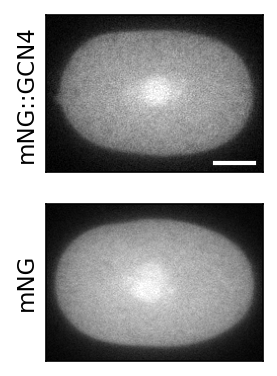

In [3]:
def panel(path, ax, scale_bar=False):
    img = load_image(path + "/af_corrected.tif")
    roi = np.loadtxt(path + "/ROI_manual.txt")
    rotated = rotated_embryo(img, roi, 220, 160, 3)
    ax.imshow(rotated, cmap="gray", vmin=0, vmax=np.percentile(rotated, 99.9))
    ax.set_xticks([])
    ax.set_yticks([])

    if scale_bar:
        px = 0.255  # pixel size
        bar_length = 10  # microns
        bar_pixels = bar_length / px
        y = rotated.shape[0] - 10
        ax.plot(
            [rotated.shape[1] - 10 - bar_pixels, rotated.shape[1] - 10],
            [y, y],
            color="w",
            linewidth=2,
        )


if raw_data_path:
    fig, ax = plt.subplots(2, 1)
    panel(paths_gcn4[2], ax[0], scale_bar=True)
    panel(paths_ctrl[0], ax[1])
    ax[0].set_ylabel("mNG::GCN4", fontsize=11)
    ax[1].set_ylabel("mNG", fontsize=11)
    fig.set_size_inches(2.5, 3)
    fig.savefig("Figs/imgs_fragment.png", dpi=600, transparent=True)